# Projeto Covid-19
## Digital Innovation one

In [9]:
#libraries
import pandas as pd
import numpy as np
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go
import re

In [7]:
#importando dados
url = "https://github.com/neylsoncrepalde/projeto_eda_covid/blob/master/covid_19_data.csv?raw=true"
df = pd.read_csv(url, parse_dates = ['ObservationDate', 'Last Update'])
df

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
26708,26709,2020-05-19,Wyoming,US,2020-05-20 02:32:19,776.0,10.0,0.0
26709,26710,2020-05-19,Xinjiang,Mainland China,2020-05-20 02:32:19,76.0,3.0,73.0
26710,26711,2020-05-19,Yukon,Canada,2020-05-20 02:32:19,11.0,0.0,11.0
26711,26712,2020-05-19,Yunnan,Mainland China,2020-05-20 02:32:19,185.0,2.0,183.0


In [8]:
#coluna de tipos
df.dtypes

SNo                         int64
ObservationDate    datetime64[ns]
Province/State             object
Country/Region             object
Last Update        datetime64[ns]
Confirmed                 float64
Deaths                    float64
Recovered                 float64
dtype: object

In [10]:
def corrige_colunas(col_name):
    return re.sub(r"[/| ]", "", col_name).lower()
    

In [16]:
df.columns = [corrige_colunas(col) for col in df.columns ]

In [17]:
df.columns

Index(['sno', 'observationdate', 'provincestate', 'countryregion',
       'lastupdate', 'confirmed', 'deaths', 'recovered'],
      dtype='object')

In [28]:
df.countryregion.unique()

array(['Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'US', 'Japan',
       'Thailand', 'South Korea', 'Singapore', 'Philippines', 'Malaysia',
       'Vietnam', 'Australia', 'Mexico', 'Brazil', 'Colombia', 'France',
       'Nepal', 'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast',
       'Germany', 'Finland', 'United Arab Emirates', 'India', 'Italy',
       'UK', 'Russia', 'Sweden', 'Spain', 'Belgium', 'Others', 'Egypt',
       'Iran', 'Israel', 'Lebanon', 'Iraq', 'Oman', 'Afghanistan',
       'Bahrain', 'Kuwait', 'Austria', 'Algeria', 'Croatia',
       'Switzerland', 'Pakistan', 'Georgia', 'Greece', 'North Macedonia',
       'Norway', 'Romania', 'Denmark', 'Estonia', 'Netherlands',
       'San Marino', ' Azerbaijan', 'Belarus', 'Iceland', 'Lithuania',
       'New Zealand', 'Nigeria', 'North Ireland', 'Ireland', 'Luxembourg',
       'Monaco', 'Qatar', 'Ecuador', 'Azerbaijan', 'Czech Republic',
       'Armenia', 'Dominican Republic', 'Indonesia', 'Portugal',
       'Andorra', 'Latvia

## Brasil

In [32]:
brasil = df.loc[
    (df.countryregion ==  'Brazil') &
    (df.confirmed > 0)
] 
brasil

,sno,observationdate,provincestate,countryregion,lastupdate,confirmed,deaths,recovered
2455,2456,2020-02-26,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2559,2560,2020-02-27,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2668,2669,2020-02-28,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0
2776,2777,2020-02-29,NaN,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0
2903,2904,2020-03-01,NaN,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...
24850,24851,2020-05-15,NaN,Brazil,2020-05-16 02:32:19,220291.0,14962.0,84970.0
25227,25228,2020-05-16,NaN,Brazil,2020-05-17 02:32:32,233511.0,15662.0,89672.0
25604,25605,2020-05-17,NaN,Brazil,2020-05-18 02:32:21,241080.0,16118.0,94122.0
25981,25982,2020-05-18,NaN,Brazil,2020-05-19 02:32:18,255368.0,16853.0,100459.0


# Casos Confirmados
## Grafico da evoluão dos casos confirmados

In [43]:
px.line(brasil, x= 'observationdate', y= 'confirmed', title = 'Casos confirmados no Brasil' )

# Novos casos por dia

In [38]:
brasil['novoscasos'] = list(map(
    lambda x: 0 if (x == 0) else brasil['confirmed'].iloc[x] - brasil['confirmed'].iloc[x-1], 
    np.arange(brasil.shape[0])
))

<ipython-input-38-28e779da704e>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [39]:
brasil

,sno,observationdate,provincestate,countryregion,lastupdate,confirmed,deaths,recovered,novoscasos
2455,2456,2020-02-26,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0,0.0
2559,2560,2020-02-27,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0,0.0
2668,2669,2020-02-28,NaN,Brazil,2020-02-26 23:53:02,1.0,0.0,0.0,0.0
2776,2777,2020-02-29,NaN,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0,1.0
2903,2904,2020-03-01,NaN,Brazil,2020-02-29 21:03:05,2.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
24850,24851,2020-05-15,NaN,Brazil,2020-05-16 02:32:19,220291.0,14962.0,84970.0,17126.0
25227,25228,2020-05-16,NaN,Brazil,2020-05-17 02:32:32,233511.0,15662.0,89672.0,13220.0
25604,25605,2020-05-17,NaN,Brazil,2020-05-18 02:32:21,241080.0,16118.0,94122.0,7569.0
25981,25982,2020-05-18,NaN,Brazil,2020-05-19 02:32:18,255368.0,16853.0,100459.0,14288.0


In [44]:
px.line(brasil,x ='observationdate', y='novoscasos', title='Novos casos por dia')

# Numero de Mortos

In [46]:
fig = go.Figure()
fig.add_trace(
    go.Scatter(x = brasil.observationdate, y = brasil.deaths, name ='Mortes',
              mode = 'lines+markers', line = {'color':'red'})

)
#layout
fig.update_layout(title ='Mortes no Brasil por COVID-19')
fig.show()

# Taxa de credimento
$$
\text{taxa de crescimento} = (presente\div passado)^{(\frac{1}{n})  -1}
$$


In [48]:
def taxa_crescimento (data, variable, data_inicio = None, data_fim = None):
    #se data inicio for 'none', define como a primeira data disponivel
    if data_inicio == None:
        data_inicio = data.observationdate.loc[data[variable] > 0].min()
    else:
        data_inicio = pd.to_datetime(data_inicio)
    #se data fim for 'none', define como a ultima data disponivel
    if data_fim == None:
        data_fim = data.observationdate.iloc[-1]
    else:
        data_fim = pd.to_datetime(data_fim)
        
    #Definidino dos valores de presente e passado
    passado = data.loc[data.observationdate ==  data_inicio, variable].values[0]
    presente = data.loc[data.observationdate == data_fim, variable].values[0]
    
    #definir numer de pontows no tempo que vamos avaliar
    
    n = (data_fim - data_inicio).days
    
    #calcular a taxa 
    taxa = (presente/passado)**(1/n)-1
    return taxa*100
    
        

In [52]:
#taxa de crescimento medio do covid no Brasil em todo o período.
taxabr = taxa_crescimento(brasil, 'confirmed')
print(f'O covid cresce no brasil uma taxa de {int(taxabr)}% ate agora')

O covid cresce no brasil uma taxa de 16% ate agora


# Taxa de crescimento diário 


In [53]:
def taxa_crescimento_diario(data, variable, data_inicio=None):
    #se data inicio for 'none', define como a primeira data disponivel
    if data_inicio == None:
        data_inicio = data.observationdate.loc[data[variable] > 0].min()
    else:
        data_inicio = pd.to_datetime(data_inicio)
        
    #data fim sera obrigatoriamente a ultima
    data_fim = data.observationdate.max()
    
    #definir numer de pontows no tempo que vamos avaliar
    n = (data_fim - data_inicio).days
    
    # taxa calculada de um dia pro outro (hoje - ontem / ontem )
    taxas = list(map(
        lambda x: ( data[variable].iloc[x] - data[variable].iloc[x - 1]) / data[variable].iloc[x - 1] ,
        range(1, n+1)
    ))
    
    return np.array(taxas) * 100
    
    
    
    

In [59]:
tx_dia = taxa_crescimento_diario(brasil, 'confirmed')
tx_dia

array([  0.        ,   0.        , 100.        ,   0.        ,
         0.        ,   0.        , 100.        ,   0.        ,
       225.        ,   0.        ,  53.84615385,  25.        ,
        24.        ,  22.58064516,  36.84210526, 190.38461538,
         0.        ,   7.28476821,  23.45679012,  60.5       ,
        15.88785047,  66.93548387,  27.69726248,  28.75157629,
        51.4201763 ,  24.45019405,  16.78794179,  13.66266133,
        16.87548943,  14.47236181,  14.25226807,   9.01639344,
         7.58928571,  24.8525879 ,  19.57320273,  17.67115272,
        12.58080557,  14.39929329,   7.43243243,   9.26325247,
        15.40169394,  15.22017956,  11.88620903,   8.54521335,
         5.54537122,   7.06807546,   5.57858688,   7.81903542,
        12.10513815,   7.4329096 ,  10.70501233,   8.83557983,
         5.44492335,   5.4043566 ,   5.73350023,   6.21648599,
         9.35157462,   8.00823407,   9.77184834,   6.36504619,
         6.88748019,   8.58316283,   8.80726429,   9.41

In [62]:
#plotando a data
primeiro_dia =brasil.observationdate.loc[brasil.confirmed > 0].min()

px.line(x = pd.date_range(primeiro_dia, brasil.observationdate.max())[1:],
       y = tx_dia, title = "Taxa de crescimentos de casos confirmados no Brasil")

# Predições 🧙‍♀️

In [67]:
#Novas bibliotecas
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

In [69]:
confirmados = brasil.confirmed
confirmados.index = brasil.observationdate
confirmados

observationdate
2020-02-26         1.0
2020-02-27         1.0
2020-02-28         1.0
2020-02-29         2.0
2020-03-01         2.0
                ...   
2020-05-15    220291.0
2020-05-16    233511.0
2020-05-17    241080.0
2020-05-18    255368.0
2020-05-19    271885.0
Name: confirmed, Length: 84, dtype: float64

In [72]:
res = seasonal_decompose(confirmados)

<Figure size 640x480 with 0 Axes>

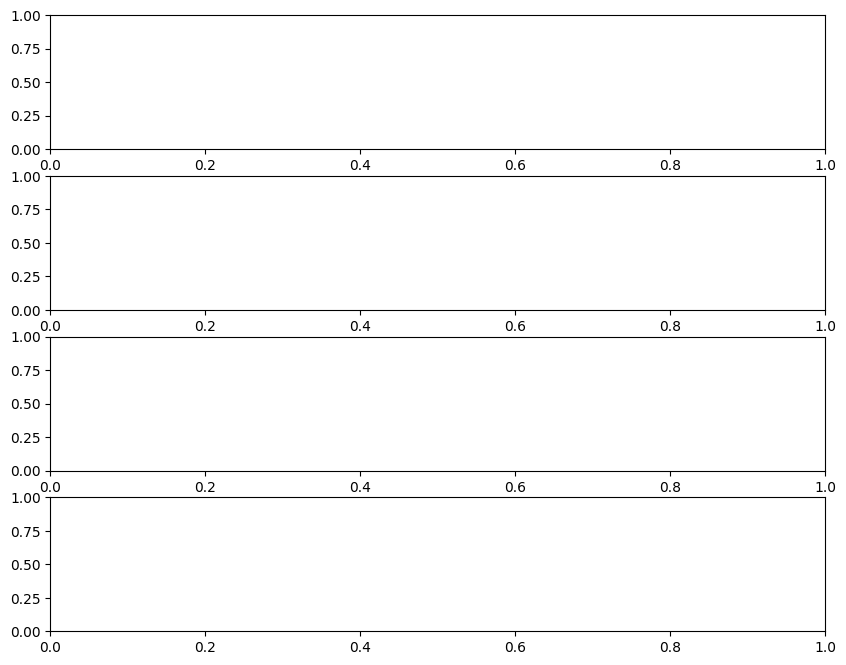

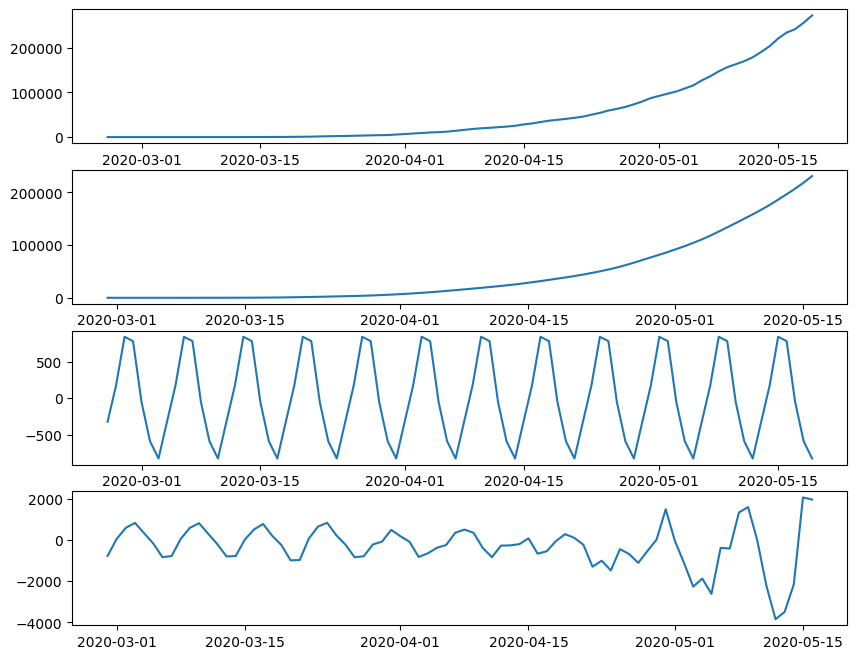

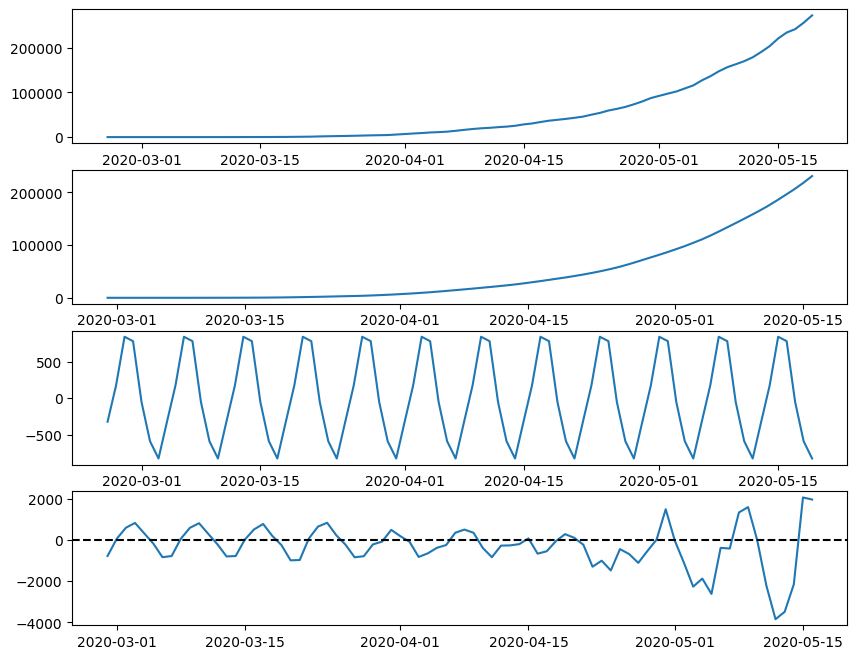

In [74]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize = (10, 8))

ax1.plot(res.observed)
ax2.plot(res.trend)
ax3.plot(res.seasonal)
ax4.plot(confirmados.index, res.resid)
ax4.axhline(0, linestyle ='dashed', c='black')
plt.show()

# Modelagem de dados - ARIMA
media movel integrada auto-reversiva  
modelando o futuro em função do passado

In [80]:
#importanto a Arima
from pmdarima.arima import auto_arima

In [81]:
modelo = auto_arima(confirmados)

In [85]:
fig = go.Figure(go.Scatter(
    x = confirmados.index, y = confirmados, name = "Observados"
))
fig.add_trace(go.Scatter(
    x = confirmados.index, y = modelo.predict_in_sample(), name = "Previsão"
))
fig.add_trace(go.Scatter(
    x = pd.date_range('2020-05-20', '2020-06-20'), y = modelo.predict(31), name='Forecast'
))
fig.update_layout(title = "Previsão de casos confirmados no Brasil para os próximos 30 dias")
fig.show()

# Modelo de Crescimento 💹

In [94]:
#importando biblioteca
from fbprophet import Prophet

In [93]:
!conda update -n base -c defaults conda


^C


In [99]:
train = confirmados.reset_index()[:-5]
test = confirmados.reset_index()[-5:]

#renomeando as colunas de acordo com a documentação da biblioteca
train.rename(columns={'observationdate':'ds', 'confirmed':'y'}, inplace = True)
test.rename(columns={'observationdate':'ds', 'confirmed':'y'}, inplace = True)

#definir o modelo de crescimento
profeta = Prophet(growth = 'logistic', changepoints = ['2020-03-21', '2020-03-30','2020-04-25','2020-05-03','2020-05-10'])


pop = 211463256 #projeção da população brasileira segundo o IBGE em maio de 2020
train['cap'] = pop

profeta.fit(train)

#Construindo previsões do futuro
future_dates = profeta.make_future_dataframe(periods = 200)
future_dates['cap'] = pop
forecast = profeta.predict(future_dates)


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [102]:
fig = go.Figure()

fig.add_trace(go.Scatter(x = forecast.ds, y = forecast.yhat, name = "Predição"))
#fig.add_trace(go.Scatter(x = test.index, y = test, name = "Observados -  teste"))
fig.add_trace(go.Scatter(x = train.ds, y = train.y, name="Observados - Treino" ))
fig.update_layout(title = "Predição de casos confirmados no Brasil")
fig.show()